In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
import platform #운영 체제 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
else:
    print('Unknown system')
    
plt.style.use('ggplot')
    
plt.rcParams['axes.unicode_minus'] = False #graph에서 마이너스 방지

# Data Loading

In [5]:
df=pd.read_csv('../data/onion_columns_all_merge_final.csv')
df.head()

,year_local,area,year,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,2010_부산광역시,부산광역시,2010,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,2011_부산광역시,부산광역시,2011,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,2012_부산광역시,부산광역시,2012,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,2013_부산광역시,부산광역시,2013,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,2014_부산광역시,부산광역시,2014,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


# Scaling

In [6]:
df_idx=df.iloc[:,3:]
df_columns = df_idx.columns.tolist()
df.head()

,year_local,area,year,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,2010_부산광역시,부산광역시,2010,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,2011_부산광역시,부산광역시,2011,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,2012_부산광역시,부산광역시,2012,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,2013_부산광역시,부산광역시,2013,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,2014_부산광역시,부산광역시,2014,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


In [7]:
df_columns

['10a당 생산량 (kg)',
 '평균기온 7월',
 '평균기온 8월',
 '평균기온 9월',
 '평균기온 10월',
 '평균기온 11월',
 '평균기온 12월',
 '평균기온 1월',
 '평균기온 2월',
 '평균기온 3월',
 '평균기온 4월',
 '평균기온 5월',
 '평균기온 6월',
 '최고기온 7월',
 '최고기온 8월',
 '최고기온 9월',
 '최고기온 10월',
 '최고기온 11월',
 '최고기온 12월',
 '최고기온 1월',
 '최고기온 2월',
 '최고기온 3월',
 '최고기온 4월',
 '최고기온 5월',
 '최고기온 6월',
 '최저기온 7월',
 '최저기온 8월',
 '최저기온 9월',
 '최저기온 10월',
 '최저기온 11월',
 '최저기온 12월',
 '최저기온 1월',
 '최저기온 2월',
 '최저기온 3월',
 '최저기온 4월',
 '최저기온 5월',
 '최저기온 6월',
 '강수량 7월',
 '강수량 8월',
 '강수량 9월',
 '강수량 10월',
 '강수량 11월',
 '강수량 12월',
 '강수량 1월',
 '강수량 2월',
 '강수량 3월',
 '강수량 4월',
 '강수량 5월',
 '강수량 6월',
 '일조시간 7월',
 '일조시간 8월',
 '일조시간 9월',
 '일조시간 10월',
 '일조시간 11월',
 '일조시간 12월',
 '일조시간 1월',
 '일조시간 2월',
 '일조시간 3월',
 '일조시간 4월',
 '일조시간 5월',
 '일조시간 6월',
 '일사량 7월',
 '일사량 8월',
 '일사량 9월',
 '일사량 10월',
 '일사량 11월',
 '일사량 12월',
 '일사량 1월',
 '일사량 2월',
 '일사량 3월',
 '일사량 4월',
 '일사량 5월',
 '일사량 6월',
 '습도 7월',
 '습도 8월',
 '습도 9월',
 '습도 10월',
 '습도 11월',
 '습도 12월',
 '습도 1월',
 '습도 2월',
 '습도 3월',
 '습도 4월',
 '습도 5월',
 '습도 6월',
 

### Scaling-1. MinMaxScaler() version

In [8]:
mms = MinMaxScaler()
df_mms = mms.fit_transform(df_idx)
df_mms = pd.DataFrame(df_mms,
                         columns=df_columns)
df_mms

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.688295,0.492168,0.604644,0.832987,0.815820,0.709517,0.705387,0.742401,0.805503,0.636747,...,0.363636,0.528026,0.163097,0.348192,0.237995,0.207970,0.000000,0.216984,0.029470,0.536199
1,0.720809,0.669318,0.887041,1.000000,0.762931,0.729696,0.691146,0.504227,0.835600,0.564683,...,0.454545,0.528026,0.036766,0.159791,0.120797,0.111806,0.010678,0.340974,0.114290,0.338864
2,0.566723,0.655994,0.683401,0.901101,0.695938,0.994535,0.641085,0.734363,0.531841,0.690984,...,0.363636,0.012660,0.224336,0.199348,0.104012,0.210779,0.088825,0.163249,0.052816,0.035089
3,0.844077,0.697481,0.852212,0.771031,0.716453,0.618715,0.540747,0.715115,0.707445,0.917795,...,0.545455,0.035354,0.200719,0.088195,0.129956,0.206667,0.034499,0.123991,0.107025,0.023216
4,0.703562,0.749566,0.895199,0.946894,0.832167,0.693753,0.708408,0.873756,0.810357,0.873040,...,0.454545,0.119747,0.000000,0.115389,0.232253,0.206667,0.059141,0.216984,0.131710,0.021430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.696353,0.239880,0.264277,0.313380,0.420595,0.633301,0.756689,0.908217,0.805144,0.667943,...,0.090909,0.183612,0.000000,0.089733,0.000000,0.077627,0.059141,0.030998,0.107490,0.021430
140,0.601923,0.051562,0.000000,0.257870,0.407750,0.678462,0.714288,0.929831,0.776053,0.625937,...,0.090909,0.098078,0.200847,0.109603,0.000000,0.088634,0.071790,0.542459,0.265846,0.035717
141,0.588634,0.000000,0.004001,0.054587,0.357609,0.730405,0.839765,0.841975,0.765251,0.612378,...,0.181818,0.093517,0.254500,0.051726,0.173882,0.055903,0.026778,0.000000,0.265846,0.030359
142,0.657478,0.678800,0.896036,0.947921,1.000000,0.895536,1.000000,0.998555,0.919634,0.872913,...,0.090909,0.093517,0.299475,0.000000,0.079787,0.000000,0.044191,0.294478,0.164192,0.000000


### Scaling-2. StandardScaler() version

In [9]:
ss = StandardScaler()
df_ss = ss.fit_transform(df_idx)
df_ss = pd.DataFrame(df_ss,
                         columns=df_columns)
df_ss.head()

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,1.004413,-0.661282,-0.181262,1.156179,1.964547,1.132865,1.297903,1.152526,1.665619,0.598437,...,0.762573,1.544753,-0.741655,0.519292,-0.237445,-0.370087,-0.888400,-0.561984,-1.148668,1.553304
1,1.176575,0.261443,1.142781,1.967798,1.691439,1.221800,1.226474,-0.060468,1.809817,0.271057,...,1.229852,1.544753,-1.231587,-0.434124,-0.744006,-0.740002,-0.854243,-0.013346,-0.814182,0.736817
2,0.360677,0.192041,0.187999,1.487185,1.345502,2.389069,0.975389,1.111590,0.354469,0.844833,...,0.762573,-1.099875,-0.504163,-0.233943,-0.816557,-0.359283,-0.604269,-0.799750,-1.056602,-0.520069
3,1.829293,0.408132,0.979482,0.855095,1.451435,0.732659,0.472137,1.013559,1.195812,1.875217,...,1.697131,-0.983421,-0.595752,-0.796441,-0.704418,-0.375101,-0.778046,-0.973462,-0.842831,-0.569193
4,1.085254,0.679429,1.181031,1.709726,2.048963,1.063385,1.313055,1.821504,1.688877,1.671897,...,1.229852,-0.550354,-1.374173,-0.658827,-0.262261,-0.375101,-0.699222,-0.561984,-0.745485,-0.576582


# X, y 분리

### Seperate-1.MinMaxScaler() version

In [10]:
X_mms=df_mms.iloc[:,1:]
X_mms.head()

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.492168,0.604644,0.832987,0.815820,0.709517,0.705387,0.742401,0.805503,0.636747,0.484144,...,0.363636,0.528026,0.163097,0.348192,0.237995,0.207970,0.000000,0.216984,0.029470,0.536199
1,0.669318,0.887041,1.000000,0.762931,0.729696,0.691146,0.504227,0.835600,0.564683,0.678721,...,0.454545,0.528026,0.036766,0.159791,0.120797,0.111806,0.010678,0.340974,0.114290,0.338864
2,0.655994,0.683401,0.901101,0.695938,0.994535,0.641085,0.734363,0.531841,0.690984,0.791025,...,0.363636,0.012660,0.224336,0.199348,0.104012,0.210779,0.088825,0.163249,0.052816,0.035089
3,0.697481,0.852212,0.771031,0.716453,0.618715,0.540747,0.715115,0.707445,0.917795,0.616604,...,0.545455,0.035354,0.200719,0.088195,0.129956,0.206667,0.034499,0.123991,0.107025,0.023216
4,0.749566,0.895199,0.946894,0.832167,0.693753,0.708408,0.873756,0.810357,0.873040,0.866717,...,0.454545,0.119747,0.000000,0.115389,0.232253,0.206667,0.059141,0.216984,0.131710,0.021430


In [11]:
y_mms=df_mms['10a당 생산량 (kg)']
y_mms

0      0.688295
1      0.720809
2      0.566723
3      0.844077
4      0.703562
         ...   
139    0.696353
140    0.601923
141    0.588634
142    0.657478
143    0.788945
Name: 10a당 생산량 (kg), Length: 144, dtype: float64

### Seperate-2.StandardScaler() version

In [12]:
X_ss=df_ss.iloc[:,1:]
X_ss.head()

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,-0.661282,-0.181262,1.156179,1.964547,1.132865,1.297903,1.152526,1.665619,0.598437,-0.355015,...,0.762573,1.544753,-0.741655,0.519292,-0.237445,-0.370087,-0.888400,-0.561984,-1.148668,1.553304
1,0.261443,1.142781,1.967798,1.691439,1.221800,1.226474,-0.060468,1.809817,0.271057,0.476957,...,1.229852,1.544753,-1.231587,-0.434124,-0.744006,-0.740002,-0.854243,-0.013346,-0.814182,0.736817
2,0.192041,0.187999,1.487185,1.345502,2.389069,0.975389,1.111590,0.354469,0.844833,0.957145,...,0.762573,-1.099875,-0.504163,-0.233943,-0.816557,-0.359283,-0.604269,-0.799750,-1.056602,-0.520069
3,0.408132,0.979482,0.855095,1.451435,0.732659,0.472137,1.013559,1.195812,1.875217,0.211359,...,1.697131,-0.983421,-0.595752,-0.796441,-0.704418,-0.375101,-0.778046,-0.973462,-0.842831,-0.569193
4,0.679429,1.181031,1.709726,2.048963,1.063385,1.313055,1.821504,1.688877,1.671897,1.280787,...,1.229852,-0.550354,-1.374173,-0.658827,-0.262261,-0.375101,-0.699222,-0.561984,-0.745485,-0.576582


In [13]:
y_ss=df_ss['10a당 생산량 (kg)']
y_ss

0      1.004413
1      1.176575
2      0.360677
3      1.829293
4      1.085254
         ...   
139    1.047079
140    0.547061
141    0.476699
142    0.841234
143    1.537367
Name: 10a당 생산량 (kg), Length: 144, dtype: float64

# train, test split

### train, test split-1.MinMaxScaler() version
### X 대문자, y 소문자

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_mms, 
                                                    y_mms, 
                                                    test_size=0.3)
print("X_train: {0}\nX_test: {1}\n\ny_train: {2}\ny_test:{3}".format(X_train.shape,
                                                                     X_test.shape,
                                                                     y_train.shape,
                                                                     y_test.shape))

X_train: (100, 189)
X_test: (44, 189)

y_train: (100,)
y_test:(44,)


### train, test split-2.StandardScaler() version
### x 소문자, Y 대문자

In [15]:
x_train, x_test, Y_train, Y_test = train_test_split(X_ss, 
                                                    y_ss, 
                                                    test_size=0.3)
print("x_train: {0}\nx_test: {1}\n\nY_train: {2}\nY_test:{3}".format(x_train.shape,
                                                                     x_test.shape,
                                                                     Y_train.shape,
                                                                     Y_test.shape))

x_train: (100, 189)
x_test: (44, 189)

Y_train: (100,)
Y_test:(44,)


# ElasticNet

### ElasticNet-1.MinMaxScaler() version

In [16]:
alphas_mms = [0.00001, 0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.0005, 0.00055, 0.0006, 0.00065,
              0.0007,0.00075,0.0008,0.00085,0.0009,0.00095,0.001, 0.0015, 0.002, 0.0025, 0.003, 
              0.0035, 0.004, 0.0045, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for a in alphas_mms:
    model = ElasticNet(alpha=a).fit(X_mms, y_mms)   
    score = model.score(X_mms, y_mms)
    pred_y = model.predict(X_mms)
    mse = mean_squared_error(y_mms, pred_y)   
    print("Alpha:{0:.5f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, 
                                                                        score, 
                                                                        mse, 
                                                                        np.sqrt(mse)))

Alpha:0.00001, R2:1.00, MSE:0.00, RMSE:0.01
Alpha:0.00005, R2:0.98, MSE:0.00, RMSE:0.03
Alpha:0.00010, R2:0.96, MSE:0.00, RMSE:0.04
Alpha:0.00015, R2:0.93, MSE:0.00, RMSE:0.05
Alpha:0.00020, R2:0.91, MSE:0.00, RMSE:0.06
Alpha:0.00025, R2:0.89, MSE:0.00, RMSE:0.06
Alpha:0.00030, R2:0.87, MSE:0.00, RMSE:0.07
Alpha:0.00050, R2:0.82, MSE:0.01, RMSE:0.08
Alpha:0.00055, R2:0.81, MSE:0.01, RMSE:0.08
Alpha:0.00060, R2:0.80, MSE:0.01, RMSE:0.08
Alpha:0.00065, R2:0.79, MSE:0.01, RMSE:0.09
Alpha:0.00070, R2:0.78, MSE:0.01, RMSE:0.09
Alpha:0.00075, R2:0.77, MSE:0.01, RMSE:0.09
Alpha:0.00080, R2:0.76, MSE:0.01, RMSE:0.09
Alpha:0.00085, R2:0.75, MSE:0.01, RMSE:0.09
Alpha:0.00090, R2:0.74, MSE:0.01, RMSE:0.10
Alpha:0.00095, R2:0.74, MSE:0.01, RMSE:0.10
Alpha:0.00100, R2:0.73, MSE:0.01, RMSE:0.10
Alpha:0.00150, R2:0.68, MSE:0.01, RMSE:0.11
Alpha:0.00200, R2:0.65, MSE:0.01, RMSE:0.11
Alpha:0.00250, R2:0.63, MSE:0.01, RMSE:0.11
Alpha:0.00300, R2:0.62, MSE:0.01, RMSE:0.12
Alpha:0.00350, R2:0.61, MSE:0.01

### ElasticNet-2.StandardScaler() version

In [17]:
alphas_ss = [0.00001, 0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.0005, 0.00055, 0.0006, 0.00065,
              0.0007,0.00075,0.0008,0.00085,0.0009,0.00095,0.001, 0.0015, 0.002, 0.0025, 0.003, 
              0.0035, 0.004, 0.0045, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for a in alphas_ss:
    model = ElasticNet(alpha=a).fit(X_ss,y_ss)   
    score = model.score(X_ss, y_ss)
    pred_y = model.predict(X_ss)
    mse = mean_squared_error(y_ss, pred_y)   
    print("Alpha:{0:.5f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, 
                                                                        score, 
                                                                        mse, 
                                                                        np.sqrt(mse)))

Alpha:0.00001, R2:1.00, MSE:0.00, RMSE:0.04
Alpha:0.00005, R2:1.00, MSE:0.00, RMSE:0.04
Alpha:0.00010, R2:1.00, MSE:0.00, RMSE:0.05
Alpha:0.00015, R2:1.00, MSE:0.00, RMSE:0.05
Alpha:0.00020, R2:1.00, MSE:0.00, RMSE:0.06
Alpha:0.00025, R2:1.00, MSE:0.00, RMSE:0.06
Alpha:0.00030, R2:1.00, MSE:0.00, RMSE:0.06
Alpha:0.00050, R2:0.99, MSE:0.01, RMSE:0.08
Alpha:0.00055, R2:0.99, MSE:0.01, RMSE:0.09
Alpha:0.00060, R2:0.99, MSE:0.01, RMSE:0.09
Alpha:0.00065, R2:0.99, MSE:0.01, RMSE:0.10
Alpha:0.00070, R2:0.99, MSE:0.01, RMSE:0.10
Alpha:0.00075, R2:0.99, MSE:0.01, RMSE:0.10
Alpha:0.00080, R2:0.99, MSE:0.01, RMSE:0.11
Alpha:0.00085, R2:0.99, MSE:0.01, RMSE:0.11
Alpha:0.00090, R2:0.99, MSE:0.01, RMSE:0.12
Alpha:0.00095, R2:0.99, MSE:0.01, RMSE:0.12
Alpha:0.00100, R2:0.98, MSE:0.02, RMSE:0.12
Alpha:0.00150, R2:0.97, MSE:0.03, RMSE:0.16
Alpha:0.00200, R2:0.96, MSE:0.04, RMSE:0.19
Alpha:0.00250, R2:0.95, MSE:0.05, RMSE:0.21
Alpha:0.00300, R2:0.94, MSE:0.06, RMSE:0.24
Alpha:0.00350, R2:0.94, MSE:0.06

# ElasticNetCV - cross_validation

### ElasticNetCV-1.MinMaxScaler() version

In [18]:
elastic_cv=ElasticNetCV(alphas=alphas_mms, cv=5)
model = elastic_cv.fit(X_train, y_train)
print(f'model.alpha_ : {model.alpha_}')
print(f'model.intercept_: {model.intercept_}')

model.alpha_ : 0.01
model.intercept_: 0.4467961291487898


In [19]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, 
                                                     mse, 
                                                     np.sqrt(mse)))

R2:0.521, MSE:0.01, RMSE:0.12


### ElasticNetCV-2.StandardScaler() version

In [20]:
elastic_cv=ElasticNetCV(alphas=alphas_ss, cv=5)
model = elastic_cv.fit(x_train, Y_train)
print(f'model.alpha_ : {model.alpha_}')
print(f'model.intercept_: {model.intercept_}')

model.alpha_ : 0.2
model.intercept_: -0.018187532512223367


In [21]:
y_pred = model.predict(x_test)
score = model.score(x_test, Y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, 
                                                     mse, 
                                                     np.sqrt(mse)))

R2:0.449, MSE:0.50, RMSE:0.71


# 변수 추출 코드-from Jisoo Kang

### MSE 계산 함수 

In [22]:
#MSE 계산 함수 
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

### 변수 추출 함수

In [23]:
def valid_columns (X_train, y_train, X_test, y_test, model):
    variable = X_train.columns
    coef = pd.DataFrame(pd.Series(model.coef_, variable).sort_values())
    valid_coef = coef[coef.values != 0]
    return valid_coef.index

### 1.MinMaxScaler() version

In [24]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = Lasso(alpha, random_state = 0)
    rmse.append(calc_metrics(X_train, y_train, X_test, y_test, model)[1])

rmse_table_mms = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_mms = rmse_table_mms.sort_values('rmse')
rmse_table_mms.head()

,alpha,rmse
3,0.0050,0.117651
2,0.0010,0.124215
4,0.0100,0.129477
1,0.0005,0.138633
5,0.0500,0.169735


In [25]:
model = Lasso(alpha=rmse_table_mms.iloc[0,0], random_state = 0)

print(' best alpha:', rmse_table_mms.iloc[0,0])
print('\n 테스트 RMSE 변수:', calc_metrics(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수:', valid_columns(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(X_train, y_train, X_test, y_test, model)))


mms_rmse_lasso = calc_metrics(X_train, y_train, X_test, y_test, model)[1]
mms_valid_columns_lasso = valid_columns(X_train, y_train, X_test, y_test, model).values.tolist()

 best alpha: 0.005

 테스트 RMSE 변수: (0.14083573059843454, 0.11765082570428224)

 추출 변수: Index(['3월 일산화탄소', '12월 이산화질소', '10월 이산화질소', '11월 일산화탄소', '12월 아황산가스',
       '4월 이산화질소', '습도 2월', '일조시간 8월', '강수량 5월', '2월 오존', '최고기온 3월', '일조시간 7월',
       '최고기온 2월', '아연 Zn'],
      dtype='object')

 추출 변수 길이: 14


### 2.StandardScaler() version

In [26]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = Lasso(alpha, random_state = 0)
    rmse.append(calc_metrics(x_train, Y_train, x_test, Y_test, model)[1])

rmse_table_ss = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_ss = rmse_table_ss.sort_values('rmse')
rmse_table_ss.head()

,alpha,rmse
5,0.050,0.795916
6,0.100,0.802442
4,0.010,0.950600
3,0.005,1.044455
7,0.500,1.083192


In [27]:
model = Lasso(alpha=rmse_table_ss.iloc[0,0], random_state = 0)

print(' best alpha:', rmse_table_ss.iloc[0,0])
print('\n 테스트 RMSE 변수:', calc_metrics(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수:', valid_columns(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(x_train, Y_train, x_test, Y_test, model)))


ss_rmse_lasso = calc_metrics(x_train, Y_train, x_test, Y_test, model)[1]
ss_valid_columns_lasso = valid_columns(x_train, Y_train, x_test, Y_test, model).values.tolist()

 best alpha: 0.05

 테스트 RMSE 변수: (0.5845560228104072, 0.7959164065571813)

 추출 변수: Index(['습도 11월', '7월 이산화질소', '12월 이산화질소', '11월 일산화탄소', '1월 일산화탄소', '적설량 2월',
       '적설량 3월', '일조시간 12월', '일조시간 10월', '8월 오존', '적설량 11월', '운량 11월', '습도 6월',
       '최고기온 2월', '6가크롬 Cr6+', '강수량 5월', '강수량 12월', '5월 일산화탄소', '1월 오존',
       '일조시간 1월', '일조시간 7월', '아연 Zn'],
      dtype='object')

 추출 변수 길이: 22


# GridSearchCV, Cross Validation 적용한 Lasso 모델

### 1.MinMaxScaler() version

In [28]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
#param_grid = {'alpha': np.logspace(-4, -0.01, 30).tolist()}

grid_search_lasso = GridSearchCV(Lasso(), 
                                 param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_squared_error', 
                                 return_train_score=True)

grid_search_lasso.fit(X_train, y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_lasso.score(X_test, y_test))))
print("최적 매개변수:", grid_search_lasso.best_params_)
# print("최고 교차 검증 점수:{}", np.sqrt(-(lasso_regressor.best_score_)))
print("최고 성능 모델:", grid_search_lasso.best_estimator_)

mms_rmse_lasso_cv =  np.sqrt(-(grid_search_lasso.score(X_test, y_test)))

테스트 RMSE 점수: 0.11765082570428224
최적 매개변수: {'alpha': 0.005}
최고 성능 모델: Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [29]:
variable = X_mms.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_lasso.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
mms_valid_columns_lasso_cv = valid_coef.index.values 
valid_coef

,0
3월 일산화탄소,-0.094469
12월 이산화질소,-0.065157
10월 이산화질소,-0.062152
11월 일산화탄소,-0.052156
12월 아황산가스,-0.024981
4월 이산화질소,-0.007900
습도 2월,-0.000457
일조시간 8월,0.000617
강수량 5월,0.004820
2월 오존,0.009506


### 2.StandardScaler() version

In [30]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
#param_grid = {'alpha': np.logspace(-4, -0.01, 30).tolist()}

grid_search_lasso = GridSearchCV(Lasso(), 
                                 param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_squared_error', 
                                 return_train_score=True)

grid_search_lasso.fit(x_train, Y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_lasso.score(x_test, Y_test))))
print("최적 매개변수:", grid_search_lasso.best_params_)
# print("최고 교차 검증 점수:{}", np.sqrt(-(lasso_regressor.best_score_)))
print("최고 성능 모델:", grid_search_lasso.best_estimator_)

ss_rmse_lasso_cv =  np.sqrt(-(grid_search_lasso.score(x_test, Y_test)))

테스트 RMSE 점수: 0.8024419731618097
최적 매개변수: {'alpha': 0.1}
최고 성능 모델: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [31]:
variable = X_ss.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_lasso.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
ss_valid_columns_lasso_cv = valid_coef.index.values 
valid_coef

,0
12월 이산화질소,-0.080717
습도 11월,-0.066844
11월 일산화탄소,-0.064971
1월 일산화탄소,-0.061280
적설량 3월,-0.010314
7월 이산화질소,-0.002487
최고기온 3월,0.004420
강수량 5월,0.013133
일조시간 8월,0.015740
습도 6월,0.055206


# Traning:Validation (70:30) 한 번 적용한 ELASTICNET 모델

### 1.MinMaxScaler() version

In [32]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = ElasticNet(alpha,l1_ratio=0.5, random_state = 0)
    rmse.append(calc_metrics(X_train, y_train, X_test, y_test, model)[1])

rmse_table_mms = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_mms = rmse_table_mms.sort_values('rmse')
rmse_table_mms.head()

,alpha,rmse
3,0.0050,0.112256
4,0.0100,0.116811
2,0.0010,0.132321
1,0.0005,0.143654
5,0.0500,0.168306


In [33]:
model = ElasticNet(alpha=rmse_table_mms.iloc[0,0], l1_ratio=0.5, random_state = 0)

print(' best alpha:', rmse_table_mms.iloc[0,0])
print('\n Training & Test RMSE 값:', calc_metrics(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수:', valid_columns(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(X_train, y_train, X_test, y_test, model)))

mms_rmse_elastic = calc_metrics(X_train, y_train, X_test, y_test, model)[1]
mms_valid_columns_elasticnet = valid_columns(X_train, y_train, X_test, y_test, model).values.tolist()

 best alpha: 0.005

 Training & Test RMSE 값: (0.12693256982046638, 0.11225621628070218)

 추출 변수: Index(['12월 이산화질소', '3월 일산화탄소', '11월 일산화탄소', '강수량 1월', '9월 미세먼지PM10', '강수량 7월',
       '습도 2월', '9월 이산화질소', '12월 아황산가스', '일사량 12월', '4월 일산화탄소', '습도 11월',
       '3월 이산화질소', '운량 12월', '운량 2월', '8월 오존', '5월 일산화탄소', '강수량 6월',
       '수소이온농도 pH', '일조시간 7월', '일조시간 8월', '강수량 12월', '강수량 5월', '최고기온 2월',
       '최고기온 3월', '아연 Zn'],
      dtype='object')

 추출 변수 길이: 26


### 2.StandardScaler() version

In [34]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = ElasticNet(alpha,l1_ratio=0.5, random_state = 0)
    rmse.append(calc_metrics(x_train, Y_train, x_test, Y_test, model)[1])

rmse_table_ss = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_ss = rmse_table_ss.sort_values('rmse')
rmse_table_ss.head()

,alpha,rmse
6,0.10,0.792965
5,0.05,0.816374
7,0.50,0.925549
4,0.01,1.036232
8,1.00,1.085187


In [35]:
model = ElasticNet(alpha=rmse_table_ss.iloc[0,0], l1_ratio=0.5, random_state = 0)

print(' best alpha:', rmse_table_ss.iloc[0,0])
print('\n Training & Test RMSE 값:', calc_metrics(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수:', valid_columns(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(x_train, Y_train, x_test, Y_test, model)))

ss_rmse_elastic = calc_metrics(x_train, Y_train, x_test, Y_test, model)[1]
ss_valid_columns_elasticnet = valid_columns(x_train, Y_train, x_test, Y_test, model).values.tolist()

 best alpha: 0.1

 Training & Test RMSE 값: (0.5914213262712883, 0.7929648373134445)

 추출 변수: Index(['습도 11월', '7월 이산화질소', '12월 이산화질소', '11월 일산화탄소', '1월 일산화탄소', '적설량 2월',
       '적설량 3월', '일조시간 12월', '습도 1월', '3월 일산화탄소', '6월 일산화탄소', '최고기온 3월',
       '일조시간 10월', '8월 오존', '운량 11월', '적설량 11월', '습도 6월', '6가크롬 Cr6+',
       '최고기온 2월', '5월 일산화탄소', '강수량 5월', '강수량 12월', '1월 오존', '일조시간 1월',
       '일조시간 7월', '아연 Zn'],
      dtype='object')

 추출 변수 길이: 26


# Cross Validation 적용한 ELASTICNET 모델

### 1.MinMaxScaler() version

In [36]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search_elastic= GridSearchCV(ElasticNet(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_elastic.fit(X_train,y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_elastic.score(X_test, y_test))))
print("최적 매개변수:", grid_search_elastic.best_params_)
print("최고 교차 검증 점수:", np.sqrt(-(grid_search_elastic.best_score_)))
print("최고 성능 모델:", grid_search_elastic.best_estimator_)

mms_rmse_elastic_cv =  np.sqrt(-(grid_search_elastic.score(X_test, y_test)))

테스트 RMSE 점수: 0.11681067001168569
최적 매개변수: {'alpha': 0.01}
최고 교차 검증 점수: 0.168727515859184
최고 성능 모델: ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [37]:
variable = X_mms.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_elastic.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
mms_valid_columns_elasticnet_cv = valid_coef.index.values 
valid_coef

,0
3월 일산화탄소,-0.085244
12월 이산화질소,-0.046725
10월 이산화질소,-0.045210
11월 일산화탄소,-0.045014
12월 아황산가스,-0.031187
4월 이산화질소,-0.022953
9월 이산화질소,-0.008310
습도 1월,-0.006767
12월 일산화탄소,-0.006079
4월 일산화탄소,-0.000563


### 2.StandardScaler() version

In [38]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search_elastic= GridSearchCV(ElasticNet(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_elastic.fit(x_train,Y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_elastic.score(x_test, Y_test))))
print("최적 매개변수:", grid_search_elastic.best_params_)
print("최고 교차 검증 점수:", np.sqrt(-(grid_search_elastic.best_score_)))
print("최고 성능 모델:", grid_search_elastic.best_estimator_)

ss_rmse_elastic_cv =  np.sqrt(-(grid_search_elastic.score(x_test, Y_test)))

테스트 RMSE 점수: 0.7929648373134445
최적 매개변수: {'alpha': 0.1}
최고 교차 검증 점수: 0.8141155238380515
최고 성능 모델: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [39]:
variable = X_ss.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_elastic.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
ss_valid_columns_elasticnet_cv = valid_coef.index.values 
valid_coef

,0
습도 11월,-0.111590
7월 이산화질소,-0.110871
12월 이산화질소,-0.098764
11월 일산화탄소,-0.091614
1월 일산화탄소,-0.060216
적설량 2월,-0.021256
적설량 3월,-0.020558
일조시간 12월,-0.016206
습도 1월,-0.011433
3월 일산화탄소,-0.001088


# 최적의 변수 추출

In [40]:
print(mms_rmse_lasso)
print(ss_rmse_lasso)
print(mms_rmse_lasso_cv)
print(ss_rmse_lasso_cv)

0.11765082570428224
0.7959164065571813
0.11765082570428224
0.8024419731618097


In [41]:
print(mms_rmse_elastic)
print(ss_rmse_elastic)
print(mms_rmse_elastic_cv)
print(ss_rmse_elastic_cv)

0.11225621628070218
0.7929648373134445
0.11681067001168569
0.7929648373134445


In [42]:
print('Lasso 을 통해 선별된 기후 변수:\n\n', mms_valid_columns_lasso)
print('Lasso 을 통해 선별된 기후 변수:\n\n', ss_valid_columns_lasso)
print('\nLasso CV 을 통해 선별된 기후 변수:\n\n', mms_valid_columns_lasso_cv)
print('\nLasso CV 을 통해 선별된 기후 변수:\n\n', ss_valid_columns_lasso_cv)

Lasso 을 통해 선별된 기후 변수:

 ['3월 일산화탄소', '12월 이산화질소', '10월 이산화질소', '11월 일산화탄소', '12월 아황산가스', '4월 이산화질소', '습도 2월', '일조시간 8월', '강수량 5월', '2월 오존', '최고기온 3월', '일조시간 7월', '최고기온 2월', '아연 Zn']
Lasso 을 통해 선별된 기후 변수:

 ['습도 11월', '7월 이산화질소', '12월 이산화질소', '11월 일산화탄소', '1월 일산화탄소', '적설량 2월', '적설량 3월', '일조시간 12월', '일조시간 10월', '8월 오존', '적설량 11월', '운량 11월', '습도 6월', '최고기온 2월', '6가크롬 Cr6+', '강수량 5월', '강수량 12월', '5월 일산화탄소', '1월 오존', '일조시간 1월', '일조시간 7월', '아연 Zn']

Lasso CV 을 통해 선별된 기후 변수:

 ['3월 일산화탄소' '12월 이산화질소' '10월 이산화질소' '11월 일산화탄소' '12월 아황산가스' '4월 이산화질소'
 '습도 2월' '일조시간 8월' '강수량 5월' '2월 오존' '최고기온 3월' '일조시간 7월' '최고기온 2월' '아연 Zn']

Lasso CV 을 통해 선별된 기후 변수:

 ['12월 이산화질소' '습도 11월' '11월 일산화탄소' '1월 일산화탄소' '적설량 3월' '7월 이산화질소' '최고기온 3월'
 '강수량 5월' '일조시간 8월' '습도 6월' '강수량 12월' '일조시간 7월' '1월 오존' '최고기온 2월' '아연 Zn']


In [43]:
print('\nElasticnet을 통해 선별된 기후 변수:\n\n', mms_valid_columns_elasticnet)
print('\nElasticnet을 통해 선별된 기후 변수:\n\n', ss_valid_columns_elasticnet)

print('\nElasticnet CV을 통해 선별된 기후 변수:\n\n', mms_valid_columns_elasticnet_cv)
print('\nElasticnet CV을 통해 선별된 기후 변수:\n\n', ss_valid_columns_elasticnet_cv)


Elasticnet을 통해 선별된 기후 변수:

 ['12월 이산화질소', '3월 일산화탄소', '11월 일산화탄소', '강수량 1월', '9월 미세먼지PM10', '강수량 7월', '습도 2월', '9월 이산화질소', '12월 아황산가스', '일사량 12월', '4월 일산화탄소', '습도 11월', '3월 이산화질소', '운량 12월', '운량 2월', '8월 오존', '5월 일산화탄소', '강수량 6월', '수소이온농도 pH', '일조시간 7월', '일조시간 8월', '강수량 12월', '강수량 5월', '최고기온 2월', '최고기온 3월', '아연 Zn']

Elasticnet을 통해 선별된 기후 변수:

 ['습도 11월', '7월 이산화질소', '12월 이산화질소', '11월 일산화탄소', '1월 일산화탄소', '적설량 2월', '적설량 3월', '일조시간 12월', '습도 1월', '3월 일산화탄소', '6월 일산화탄소', '최고기온 3월', '일조시간 10월', '8월 오존', '운량 11월', '적설량 11월', '습도 6월', '6가크롬 Cr6+', '최고기온 2월', '5월 일산화탄소', '강수량 5월', '강수량 12월', '1월 오존', '일조시간 1월', '일조시간 7월', '아연 Zn']

Elasticnet CV을 통해 선별된 기후 변수:

 ['3월 일산화탄소' '12월 이산화질소' '10월 이산화질소' '11월 일산화탄소' '12월 아황산가스' '4월 이산화질소'
 '9월 이산화질소' '습도 1월' '12월 일산화탄소' '4월 일산화탄소' '평균기온 12월' '강수량 5월' '일조시간 8월'
 '평균기온 3월' '2월 오존' '수소이온농도 pH' '최고기온 3월' '일조시간 7월' '최고기온 2월' '아연 Zn']

Elasticnet CV을 통해 선별된 기후 변수:

 ['습도 11월' '7월 이산화질소' '12월 이산화질소' '11월 일산화탄소' '1월 일산화탄소' '적설량 2월' '적설량 3월'
 '일조시간 12월' '습도

# 각 과정별 변수 포함 비교

## Lasso 비교

In [44]:
[i for i in mms_valid_columns_lasso if i in mms_valid_columns_lasso_cv]

['3월 일산화탄소',
 '12월 이산화질소',
 '10월 이산화질소',
 '11월 일산화탄소',
 '12월 아황산가스',
 '4월 이산화질소',
 '습도 2월',
 '일조시간 8월',
 '강수량 5월',
 '2월 오존',
 '최고기온 3월',
 '일조시간 7월',
 '최고기온 2월',
 '아연 Zn']

In [45]:
[i for i in ss_valid_columns_lasso if i in ss_valid_columns_lasso_cv]

['습도 11월',
 '7월 이산화질소',
 '12월 이산화질소',
 '11월 일산화탄소',
 '1월 일산화탄소',
 '적설량 3월',
 '습도 6월',
 '최고기온 2월',
 '강수량 5월',
 '강수량 12월',
 '1월 오존',
 '일조시간 7월',
 '아연 Zn']

In [46]:
[i for i in mms_valid_columns_lasso if i in ss_valid_columns_lasso]

['12월 이산화질소', '11월 일산화탄소', '강수량 5월', '일조시간 7월', '최고기온 2월', '아연 Zn']

In [47]:
[i for i in mms_valid_columns_lasso_cv if i in ss_valid_columns_lasso_cv]

['12월 이산화질소',
 '11월 일산화탄소',
 '일조시간 8월',
 '강수량 5월',
 '최고기온 3월',
 '일조시간 7월',
 '최고기온 2월',
 '아연 Zn']

## ElasticNet 비교

In [48]:
[i for i in mms_valid_columns_elasticnet if i in mms_valid_columns_elasticnet_cv]

['12월 이산화질소',
 '3월 일산화탄소',
 '11월 일산화탄소',
 '9월 이산화질소',
 '12월 아황산가스',
 '4월 일산화탄소',
 '수소이온농도 pH',
 '일조시간 7월',
 '일조시간 8월',
 '강수량 5월',
 '최고기온 2월',
 '최고기온 3월',
 '아연 Zn']

In [49]:
[i for i in ss_valid_columns_elasticnet if i in ss_valid_columns_elasticnet_cv]

['습도 11월',
 '7월 이산화질소',
 '12월 이산화질소',
 '11월 일산화탄소',
 '1월 일산화탄소',
 '적설량 2월',
 '적설량 3월',
 '일조시간 12월',
 '습도 1월',
 '3월 일산화탄소',
 '6월 일산화탄소',
 '최고기온 3월',
 '일조시간 10월',
 '8월 오존',
 '운량 11월',
 '적설량 11월',
 '습도 6월',
 '6가크롬 Cr6+',
 '최고기온 2월',
 '5월 일산화탄소',
 '강수량 5월',
 '강수량 12월',
 '1월 오존',
 '일조시간 1월',
 '일조시간 7월',
 '아연 Zn']

In [50]:
[i for i in mms_valid_columns_elasticnet if i in ss_valid_columns_elasticnet]

['12월 이산화질소',
 '3월 일산화탄소',
 '11월 일산화탄소',
 '습도 11월',
 '8월 오존',
 '5월 일산화탄소',
 '일조시간 7월',
 '강수량 12월',
 '강수량 5월',
 '최고기온 2월',
 '최고기온 3월',
 '아연 Zn']

In [51]:
[i for i in mms_valid_columns_elasticnet_cv if i in ss_valid_columns_elasticnet_cv]

['3월 일산화탄소',
 '12월 이산화질소',
 '11월 일산화탄소',
 '습도 1월',
 '강수량 5월',
 '최고기온 3월',
 '일조시간 7월',
 '최고기온 2월',
 '아연 Zn']

In [52]:
print('\nLasso CV 을 통해 선별된 기후 변수:\n\n', mms_valid_columns_lasso_cv)
print('\nElasticnet CV을 통해 선별된 기후 변수:\n\n', mms_valid_columns_elasticnet_cv)


Lasso CV 을 통해 선별된 기후 변수:

 ['3월 일산화탄소' '12월 이산화질소' '10월 이산화질소' '11월 일산화탄소' '12월 아황산가스' '4월 이산화질소'
 '습도 2월' '일조시간 8월' '강수량 5월' '2월 오존' '최고기온 3월' '일조시간 7월' '최고기온 2월' '아연 Zn']

Elasticnet CV을 통해 선별된 기후 변수:

 ['3월 일산화탄소' '12월 이산화질소' '10월 이산화질소' '11월 일산화탄소' '12월 아황산가스' '4월 이산화질소'
 '9월 이산화질소' '습도 1월' '12월 일산화탄소' '4월 일산화탄소' '평균기온 12월' '강수량 5월' '일조시간 8월'
 '평균기온 3월' '2월 오존' '수소이온농도 pH' '최고기온 3월' '일조시간 7월' '최고기온 2월' '아연 Zn']


In [53]:
[i for i in mms_valid_columns_elasticnet_cv if i not in mms_valid_columns_lasso_cv]

['9월 이산화질소',
 '습도 1월',
 '12월 일산화탄소',
 '4월 일산화탄소',
 '평균기온 12월',
 '평균기온 3월',
 '수소이온농도 pH']

In [54]:
len(mms_valid_columns_lasso_cv)

14

In [55]:
len(mms_valid_columns_elasticnet_cv)

20

In [56]:
col_list=mms_valid_columns_elasticnet_cv
col_list

array(['3월 일산화탄소', '12월 이산화질소', '10월 이산화질소', '11월 일산화탄소', '12월 아황산가스',
       '4월 이산화질소', '9월 이산화질소', '습도 1월', '12월 일산화탄소', '4월 일산화탄소',
       '평균기온 12월', '강수량 5월', '일조시간 8월', '평균기온 3월', '2월 오존', '수소이온농도 pH',
       '최고기온 3월', '일조시간 7월', '최고기온 2월', '아연 Zn'], dtype=object)

In [57]:
X_train=X_train[col_list]
X_train

,3월 일산화탄소,12월 이산화질소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,4월 이산화질소,9월 이산화질소,습도 1월,12월 일산화탄소,4월 일산화탄소,평균기온 12월,강수량 5월,일조시간 8월,평균기온 3월,2월 오존,수소이온농도 pH,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
133,0.50,0.481481,0.214286,0.285714,0.285714,0.333333,0.454545,0.495667,0.375,0.333333,0.427342,0.689212,0.579868,0.756247,0.448276,0.925264,0.868523,0.374291,0.660377,0.879402
131,0.50,0.481481,0.464286,0.285714,0.285714,0.458333,0.409091,0.543058,0.375,0.666667,0.683593,0.577022,0.476434,0.679858,0.413793,0.961228,0.786099,0.392183,0.776473,1.000000
50,0.50,0.629630,0.392857,0.428571,0.714286,0.625000,0.545455,0.172034,0.375,0.666667,0.566209,0.522396,0.548944,0.481241,0.275862,0.028211,0.592315,0.407971,0.803951,0.013437
64,0.75,0.814815,0.821429,0.428571,0.571429,0.791667,0.909091,0.696066,0.500,0.666667,0.090283,0.099802,0.280230,0.353271,0.172414,0.059141,0.631846,0.468595,0.443237,0.107490
61,0.75,0.777778,1.000000,0.428571,0.714286,0.791667,0.818182,0.642791,0.500,0.666667,0.224714,0.072856,0.105566,0.264898,0.103448,0.010678,0.357278,0.071698,0.205429,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.50,0.296296,0.285714,0.285714,0.571429,0.333333,0.318182,0.571916,0.375,0.666667,0.652974,0.431593,0.327735,0.391654,0.620690,0.167761,0.349430,0.219419,0.459464,0.386784
95,0.75,0.555556,0.500000,0.428571,0.285714,0.291667,0.454545,0.944683,0.625,0.333333,0.480414,0.110275,0.708253,0.324445,0.379310,0.124941,0.544057,0.440177,0.444909,0.230181
66,0.75,0.851852,0.678571,0.428571,0.428571,0.750000,0.818182,0.679893,0.500,0.666667,0.379127,0.063704,0.697697,0.340299,0.172414,0.102848,0.604819,0.345453,0.362158,0.226840
77,0.50,0.481481,0.250000,0.428571,0.285714,0.166667,0.318182,0.474165,0.500,0.333333,0.148716,0.814124,0.261036,0.492961,0.413793,0.060546,0.560609,0.303300,0.100760,0.170818


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() #빈 데이터 프레임 만들기 
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])] #각각의 컬럼에 VIP구하기 
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,26.467794,3월 일산화탄소
1,83.066886,12월 이산화질소
2,87.514967,10월 이산화질소
3,26.051848,11월 일산화탄소
4,15.807021,12월 아황산가스
5,39.901008,4월 이산화질소
6,75.443654,9월 이산화질소
7,11.553258,습도 1월
8,37.100898,12월 일산화탄소
9,16.964800,4월 일산화탄소


In [59]:
ela_cor=X_train.corr()
ela_cor

,3월 일산화탄소,12월 이산화질소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,4월 이산화질소,9월 이산화질소,습도 1월,12월 일산화탄소,4월 일산화탄소,평균기온 12월,강수량 5월,일조시간 8월,평균기온 3월,2월 오존,수소이온농도 pH,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
3월 일산화탄소,1.000000,0.315796,0.335070,0.601914,0.425124,0.281227,0.294762,0.209552,0.598193,0.674952,-0.603209,-0.152618,-0.159474,-0.396135,-0.371105,-0.110983,-0.133294,-0.090619,-0.502782,-0.144004
12월 이산화질소,0.315796,1.000000,0.839321,0.454192,0.430073,0.815063,0.842365,0.133832,0.581550,0.208938,-0.507077,0.070838,0.111804,-0.134069,-0.736178,0.000367,0.173680,0.025978,-0.151587,-0.002740
10월 이산화질소,0.335070,0.839321,1.000000,0.382858,0.533883,0.845480,0.901177,0.201412,0.433676,0.301066,-0.497104,0.049311,-0.216682,-0.261969,-0.757670,-0.087728,-0.046040,-0.105581,-0.272943,-0.145693
11월 일산화탄소,0.601914,0.454192,0.382858,1.000000,0.460142,0.299340,0.367528,0.293403,0.824895,0.440041,-0.659807,0.032878,-0.218339,-0.590336,-0.542405,-0.150534,-0.310721,-0.203075,-0.488731,-0.173377
12월 아황산가스,0.425124,0.430073,0.533883,0.460142,1.000000,0.572893,0.512280,0.089394,0.475935,0.558312,-0.455899,0.160816,-0.196505,-0.415076,-0.498961,-0.082085,-0.347140,-0.281177,-0.300013,-0.167731
4월 이산화질소,0.281227,0.815063,0.845480,0.299340,0.572893,1.000000,0.890231,0.052602,0.402920,0.378927,-0.313604,0.118820,-0.003200,-0.122318,-0.595496,-0.126428,0.008716,-0.115109,-0.091325,-0.148945
9월 이산화질소,0.294762,0.842365,0.901177,0.367528,0.512280,0.890231,1.000000,0.212337,0.448831,0.323128,-0.475840,0.140319,-0.054373,-0.180317,-0.659149,-0.116617,0.022286,-0.121850,-0.256209,-0.146656
습도 1월,0.209552,0.133832,0.201412,0.293403,0.089394,0.052602,0.212337,1.000000,0.395518,0.164005,-0.405925,-0.084963,-0.059606,-0.393098,-0.259274,-0.309189,-0.189313,-0.226946,-0.446080,-0.293826
12월 일산화탄소,0.598193,0.581550,0.433676,0.824895,0.475935,0.402920,0.448831,0.395518,1.000000,0.444538,-0.661722,-0.010677,-0.044905,-0.536857,-0.566650,-0.162375,-0.198687,-0.230990,-0.477778,-0.150734
4월 일산화탄소,0.674952,0.208938,0.301066,0.440041,0.558312,0.378927,0.323128,0.164005,0.444538,1.000000,-0.384235,0.097738,-0.198424,-0.371567,-0.253186,-0.133985,-0.265217,-0.286428,-0.313233,-0.153532


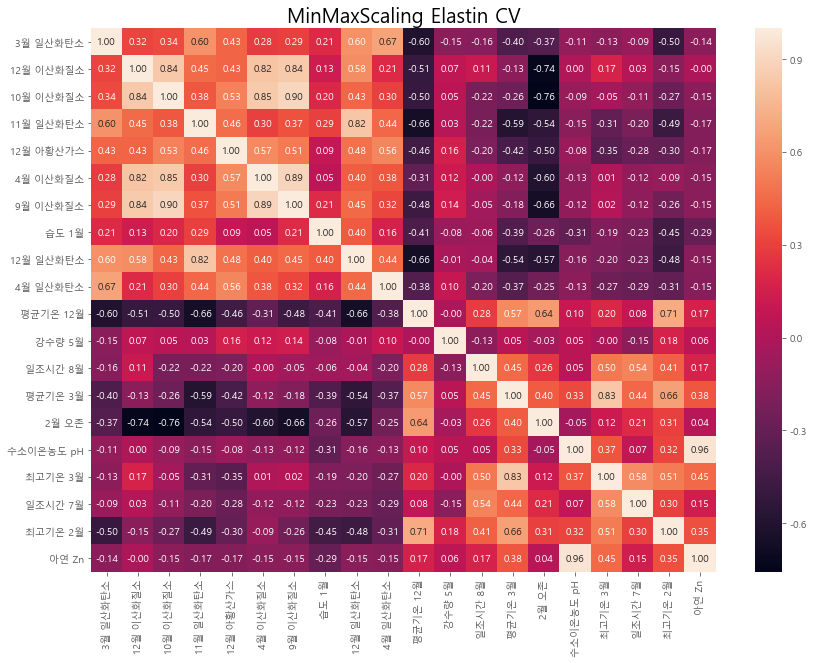

In [60]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(ela_cor, annot=True, fmt='0.2f')
plt.title('MinMaxScaling Elastin CV', fontsize=20)
plt.show()

In [61]:
pop_list=['1월 일산화탄소','4월 이산화질소', '9월 이산화질소','최저기온 12월',
          '평균기온 12월', '수소이온농도 pH', '평균기온 3월','수은 Hg','12월 이산화질소']

In [62]:
col=[i for i in col_list if i not in pop_list]
col

['3월 일산화탄소',
 '10월 이산화질소',
 '11월 일산화탄소',
 '12월 아황산가스',
 '습도 1월',
 '12월 일산화탄소',
 '4월 일산화탄소',
 '강수량 5월',
 '일조시간 8월',
 '2월 오존',
 '최고기온 3월',
 '일조시간 7월',
 '최고기온 2월',
 '아연 Zn']

In [63]:
X_cor=X_train[col]
X_cor

,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
133,0.50,0.214286,0.285714,0.285714,0.495667,0.375,0.333333,0.689212,0.579868,0.448276,0.868523,0.374291,0.660377,0.879402
131,0.50,0.464286,0.285714,0.285714,0.543058,0.375,0.666667,0.577022,0.476434,0.413793,0.786099,0.392183,0.776473,1.000000
50,0.50,0.392857,0.428571,0.714286,0.172034,0.375,0.666667,0.522396,0.548944,0.275862,0.592315,0.407971,0.803951,0.013437
64,0.75,0.821429,0.428571,0.571429,0.696066,0.500,0.666667,0.099802,0.280230,0.172414,0.631846,0.468595,0.443237,0.107490
61,0.75,1.000000,0.428571,0.714286,0.642791,0.500,0.666667,0.072856,0.105566,0.103448,0.357278,0.071698,0.205429,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.50,0.285714,0.285714,0.571429,0.571916,0.375,0.666667,0.431593,0.327735,0.620690,0.349430,0.219419,0.459464,0.386784
95,0.75,0.500000,0.428571,0.285714,0.944683,0.625,0.333333,0.110275,0.708253,0.379310,0.544057,0.440177,0.444909,0.230181
66,0.75,0.678571,0.428571,0.428571,0.679893,0.500,0.666667,0.063704,0.697697,0.172414,0.604819,0.345453,0.362158,0.226840
77,0.50,0.250000,0.428571,0.285714,0.474165,0.500,0.333333,0.814124,0.261036,0.413793,0.560609,0.303300,0.100760,0.170818


In [64]:
corr=X_cor.corr()
corr

,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
3월 일산화탄소,1.000000,0.335070,0.601914,0.425124,0.209552,0.598193,0.674952,-0.152618,-0.159474,-0.371105,-0.133294,-0.090619,-0.502782,-0.144004
10월 이산화질소,0.335070,1.000000,0.382858,0.533883,0.201412,0.433676,0.301066,0.049311,-0.216682,-0.757670,-0.046040,-0.105581,-0.272943,-0.145693
11월 일산화탄소,0.601914,0.382858,1.000000,0.460142,0.293403,0.824895,0.440041,0.032878,-0.218339,-0.542405,-0.310721,-0.203075,-0.488731,-0.173377
12월 아황산가스,0.425124,0.533883,0.460142,1.000000,0.089394,0.475935,0.558312,0.160816,-0.196505,-0.498961,-0.347140,-0.281177,-0.300013,-0.167731
습도 1월,0.209552,0.201412,0.293403,0.089394,1.000000,0.395518,0.164005,-0.084963,-0.059606,-0.259274,-0.189313,-0.226946,-0.446080,-0.293826
12월 일산화탄소,0.598193,0.433676,0.824895,0.475935,0.395518,1.000000,0.444538,-0.010677,-0.044905,-0.566650,-0.198687,-0.230990,-0.477778,-0.150734
4월 일산화탄소,0.674952,0.301066,0.440041,0.558312,0.164005,0.444538,1.000000,0.097738,-0.198424,-0.253186,-0.265217,-0.286428,-0.313233,-0.153532
강수량 5월,-0.152618,0.049311,0.032878,0.160816,-0.084963,-0.010677,0.097738,1.000000,-0.133764,-0.032393,-0.004483,-0.146264,0.175540,0.061135
일조시간 8월,-0.159474,-0.216682,-0.218339,-0.196505,-0.059606,-0.044905,-0.198424,-0.133764,1.000000,0.263226,0.499032,0.541309,0.409570,0.170911
2월 오존,-0.371105,-0.757670,-0.542405,-0.498961,-0.259274,-0.566650,-0.253186,-0.032393,0.263226,1.000000,0.119269,0.208171,0.305927,0.041834


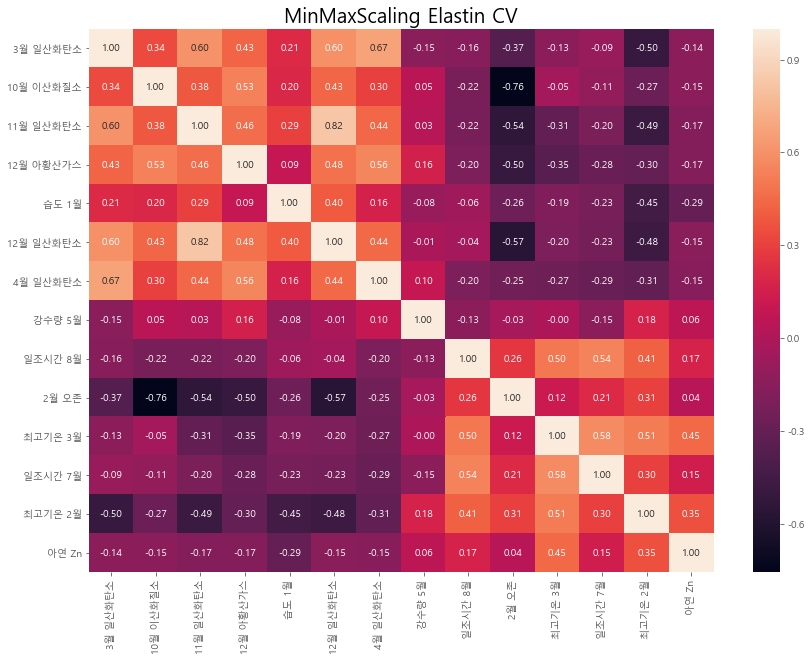

In [65]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt='0.2f')
plt.title('MinMaxScaling Elastin CV', fontsize=20)
plt.show()

In [66]:
X_elastic=X_cor
X_elastic

,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
133,0.50,0.214286,0.285714,0.285714,0.495667,0.375,0.333333,0.689212,0.579868,0.448276,0.868523,0.374291,0.660377,0.879402
131,0.50,0.464286,0.285714,0.285714,0.543058,0.375,0.666667,0.577022,0.476434,0.413793,0.786099,0.392183,0.776473,1.000000
50,0.50,0.392857,0.428571,0.714286,0.172034,0.375,0.666667,0.522396,0.548944,0.275862,0.592315,0.407971,0.803951,0.013437
64,0.75,0.821429,0.428571,0.571429,0.696066,0.500,0.666667,0.099802,0.280230,0.172414,0.631846,0.468595,0.443237,0.107490
61,0.75,1.000000,0.428571,0.714286,0.642791,0.500,0.666667,0.072856,0.105566,0.103448,0.357278,0.071698,0.205429,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.50,0.285714,0.285714,0.571429,0.571916,0.375,0.666667,0.431593,0.327735,0.620690,0.349430,0.219419,0.459464,0.386784
95,0.75,0.500000,0.428571,0.285714,0.944683,0.625,0.333333,0.110275,0.708253,0.379310,0.544057,0.440177,0.444909,0.230181
66,0.75,0.678571,0.428571,0.428571,0.679893,0.500,0.666667,0.063704,0.697697,0.172414,0.604819,0.345453,0.362158,0.226840
77,0.50,0.250000,0.428571,0.285714,0.474165,0.500,0.333333,0.814124,0.261036,0.413793,0.560609,0.303300,0.100760,0.170818


In [67]:
X_elastic.reset_index(inplace=True)
X_elastic

,index,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
0,133,0.50,0.214286,0.285714,0.285714,0.495667,0.375,0.333333,0.689212,0.579868,0.448276,0.868523,0.374291,0.660377,0.879402
1,131,0.50,0.464286,0.285714,0.285714,0.543058,0.375,0.666667,0.577022,0.476434,0.413793,0.786099,0.392183,0.776473,1.000000
2,50,0.50,0.392857,0.428571,0.714286,0.172034,0.375,0.666667,0.522396,0.548944,0.275862,0.592315,0.407971,0.803951,0.013437
3,64,0.75,0.821429,0.428571,0.571429,0.696066,0.500,0.666667,0.099802,0.280230,0.172414,0.631846,0.468595,0.443237,0.107490
4,61,0.75,1.000000,0.428571,0.714286,0.642791,0.500,0.666667,0.072856,0.105566,0.103448,0.357278,0.071698,0.205429,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,112,0.50,0.285714,0.285714,0.571429,0.571916,0.375,0.666667,0.431593,0.327735,0.620690,0.349430,0.219419,0.459464,0.386784
96,95,0.75,0.500000,0.428571,0.285714,0.944683,0.625,0.333333,0.110275,0.708253,0.379310,0.544057,0.440177,0.444909,0.230181
97,66,0.75,0.678571,0.428571,0.428571,0.679893,0.500,0.666667,0.063704,0.697697,0.172414,0.604819,0.345453,0.362158,0.226840
98,77,0.50,0.250000,0.428571,0.285714,0.474165,0.500,0.333333,0.814124,0.261036,0.413793,0.560609,0.303300,0.100760,0.170818


In [68]:
y_mms=pd.DataFrame(y_mms)
y_mms.reset_index(inplace=True)
y_mms

,index,10a당 생산량 (kg)
0,0,0.688295
1,1,0.720809
2,2,0.566723
3,3,0.844077
4,4,0.703562
...,...,...
139,139,0.696353
140,140,0.601923
141,141,0.588634
142,142,0.657478


In [69]:
elastic_data=pd.merge(X_elastic,
                      y_mms,
                      on='index')
elastic_data

,index,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn,10a당 생산량 (kg)
0,133,0.50,0.214286,0.285714,0.285714,0.495667,0.375,0.333333,0.689212,0.579868,0.448276,0.868523,0.374291,0.660377,0.879402,0.608849
1,131,0.50,0.464286,0.285714,0.285714,0.543058,0.375,0.666667,0.577022,0.476434,0.413793,0.786099,0.392183,0.776473,1.000000,0.726604
2,50,0.50,0.392857,0.428571,0.714286,0.172034,0.375,0.666667,0.522396,0.548944,0.275862,0.592315,0.407971,0.803951,0.013437,0.375459
3,64,0.75,0.821429,0.428571,0.571429,0.696066,0.500,0.666667,0.099802,0.280230,0.172414,0.631846,0.468595,0.443237,0.107490,0.329941
4,61,0.75,1.000000,0.428571,0.714286,0.642791,0.500,0.666667,0.072856,0.105566,0.103448,0.357278,0.071698,0.205429,0.000000,0.139101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,112,0.50,0.285714,0.285714,0.571429,0.571916,0.375,0.666667,0.431593,0.327735,0.620690,0.349430,0.219419,0.459464,0.386784,0.521204
96,95,0.75,0.500000,0.428571,0.285714,0.944683,0.625,0.333333,0.110275,0.708253,0.379310,0.544057,0.440177,0.444909,0.230181,0.416879
97,66,0.75,0.678571,0.428571,0.428571,0.679893,0.500,0.666667,0.063704,0.697697,0.172414,0.604819,0.345453,0.362158,0.226840,0.320187
98,77,0.50,0.250000,0.428571,0.285714,0.474165,0.500,0.333333,0.814124,0.261036,0.413793,0.560609,0.303300,0.100760,0.170818,0.459146


In [70]:
elastic_data.drop(['index'],axis=1,inplace=True)
elastic_data

,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn,10a당 생산량 (kg)
0,0.50,0.214286,0.285714,0.285714,0.495667,0.375,0.333333,0.689212,0.579868,0.448276,0.868523,0.374291,0.660377,0.879402,0.608849
1,0.50,0.464286,0.285714,0.285714,0.543058,0.375,0.666667,0.577022,0.476434,0.413793,0.786099,0.392183,0.776473,1.000000,0.726604
2,0.50,0.392857,0.428571,0.714286,0.172034,0.375,0.666667,0.522396,0.548944,0.275862,0.592315,0.407971,0.803951,0.013437,0.375459
3,0.75,0.821429,0.428571,0.571429,0.696066,0.500,0.666667,0.099802,0.280230,0.172414,0.631846,0.468595,0.443237,0.107490,0.329941
4,0.75,1.000000,0.428571,0.714286,0.642791,0.500,0.666667,0.072856,0.105566,0.103448,0.357278,0.071698,0.205429,0.000000,0.139101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.50,0.285714,0.285714,0.571429,0.571916,0.375,0.666667,0.431593,0.327735,0.620690,0.349430,0.219419,0.459464,0.386784,0.521204
96,0.75,0.500000,0.428571,0.285714,0.944683,0.625,0.333333,0.110275,0.708253,0.379310,0.544057,0.440177,0.444909,0.230181,0.416879
97,0.75,0.678571,0.428571,0.428571,0.679893,0.500,0.666667,0.063704,0.697697,0.172414,0.604819,0.345453,0.362158,0.226840,0.320187
98,0.50,0.250000,0.428571,0.285714,0.474165,0.500,0.333333,0.814124,0.261036,0.413793,0.560609,0.303300,0.100760,0.170818,0.459146


In [71]:
col_list=['year_local','area','year','10a당 생산량 (kg)']+col
col_list

['year_local',
 'area',
 'year',
 '10a당 생산량 (kg)',
 '3월 일산화탄소',
 '10월 이산화질소',
 '11월 일산화탄소',
 '12월 아황산가스',
 '습도 1월',
 '12월 일산화탄소',
 '4월 일산화탄소',
 '강수량 5월',
 '일조시간 8월',
 '2월 오존',
 '최고기온 3월',
 '일조시간 7월',
 '최고기온 2월',
 '아연 Zn']

In [72]:
elastic_data=df.loc[:,col_list]
elastic_data

,year_local,area,year,10a당 생산량 (kg),3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
0,2010_부산광역시,부산광역시,2010,7163,0.4,0.021,0.466667,0.006333,40.709677,0.466667,0.4,6.025806,4.451613,0.024,11.545161,2.709677,10.010714,36.433500
1,2011_부산광역시,부산광역시,2011,7393,0.4,0.019,0.500000,0.007000,33.645161,0.500000,0.4,5.483871,6.903226,0.024,12.522581,5.322581,10.860714,40.263000
2,2012_부산광역시,부산광역시,2012,6303,0.4,0.021,0.400000,0.006000,41.774194,0.400000,0.4,1.164516,3.903226,0.022,12.319355,5.677419,7.196552,37.487552
3,2013_부산광역시,부산광역시,2013,8265,0.5,0.023,0.500000,0.006000,41.709677,0.500000,0.4,6.483871,7.064516,0.025,14.683871,7.225806,9.278571,39.935000
4,2014_부산광역시,부산광역시,2014,7271,0.4,0.018,0.400000,0.007000,41.419355,0.400000,0.4,4.706452,9.258065,0.027,14.509677,7.096774,9.921429,41.049500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2014_제주도,제주도,2014,7220,0.5,0.008,0.300000,0.003000,46.713115,0.400000,0.3,4.415323,6.588710,0.037,10.444355,4.926829,8.000000,39.956000
140,2015_제주도,제주도,2015,6552,0.4,0.010,0.300000,0.003000,50.867769,0.300000,0.4,6.520161,3.040323,0.040,10.225806,3.120968,7.780357,47.105500
141,2016_제주도,제주도,2016,6458,0.3,0.012,0.400000,0.002000,50.306452,0.400000,0.3,3.812903,5.112903,0.039,10.347581,4.540984,7.654310,47.105500
142,2017_제주도,제주도,2017,6945,0.3,0.010,0.300000,0.003000,67.118280,0.300000,0.3,1.384946,9.086022,0.040,13.159140,6.432990,10.577381,42.516000


In [73]:
elastic_data.to_csv('../data/elastic_data.csv',
                    index=False,
                    encoding='utf-8')